## Hydrology 

- ETP comparison

In [1]:
import datetime
import os

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np

from obs_data import *

print(os.getcwd())

2016
/Users/DayTightChunks/Documents/PhD/Models/pesti-beach16/Analysis


In [2]:
PC = False
version = "vETP2"
folder = "1"
short_sim = True

In [3]:
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

vETP2/


### Import

In [4]:
# ETP (mm -> m3)
etp_obs = getETP()

# ETP sim
col = "sim"
name_tss = "accEtp_m3"
filename = "resW_" + name_tss + ".tss"

etp_sim_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)


In [5]:
etp_m3 = etp_obs.ETPmm*47*(10**4)/10**3

In [6]:
etp_sim_m3.head()

,Jdays,sim
0,177,271.013
1,178,1020.180
2,179,1428.910
3,180,633.223
4,181,1681.780


In [7]:
# Julian days
s = 176
e = 300

In [8]:
jdays = etp_sim_m3['Jdays']

In [9]:
dates = getTime(sep=";")
# x = dates.Date.tolist()[s:e]
etpObs = etp_m3.tolist()[s:e]

# Julian days
x = jdays.tolist()

if short_sim:
    etpSim = etp_sim_m3.sim.tolist()
else:
    etpSim = etp_sim_m3.sim.tolist()[s:e]


In [10]:
traceObs = go.Scatter(
    x = x,
    y = etpObs,
    mode = 'lines',
    name = 'ETP (m3/d)',
    marker=dict(
        color= 'green')
)

traceSim = go.Scatter(
    x = x,
    y = etpSim,
    mode = 'lines',
    name = 'ETP Sim.',
    marker=dict(
        color= 'blue')
)

In [11]:
data = [traceObs, traceSim]
figname = "ETP.png"

%matplotlib inline
import plotlycred

online = False
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=data) # , layout=layout)
    py.image.save_as(fig, filename=figname)
    # py.plot(fig, filename=figname) # Opens in web
else:
    fig = go.Figure(data=data) # , layout=layout)
    iplot(fig)


PlotlyError: Sign in failed.

Follow this link to interact with the (old) data:

https://plot.ly/~DayTimeChunks/37/


In [12]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)

NameError: name 'online' is not defined

In [37]:
name_tss = "cum_rain_obs_m3" 
filename = "resW_" + name_tss + ".tss"
col = "Rain"

# Rain (m3)
rain_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)
rain_m3.head()

,Jdays,Rain
0,167,563.688
1,168,563.688
2,169,563.688
3,170,563.688
4,171,563.688


In [38]:
# Cumulative observed Q (m3/d)
name_tss = "cum_q_obs_m3"
filename = "resW_" + name_tss + ".tss"
col = "sim"
cumQ_obs = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)
cumQ_obs.head()

,Jdays,sim
0,167,0.0
1,168,0.0
2,169,0.0
3,170,0.0
4,171,0.0


In [39]:
# Rain - Obs Q -> Theoretical ETP
etpTh = rain_m3.Rain - cumQ_obs.sim

In [40]:
# Cumulative sim Q (m3/d)
name_tss = "cum_q_sim_m3"
filename = "resW_" + name_tss + ".tss"
col = "sim"
cumQ_sim = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)
cumQ_sim.head()

,Jdays,sim
0,167,0.0
1,168,0.0
2,169,0.0
3,170,0.0
4,171,0.0


In [41]:
name_tss = "totEtp_m3" 
filename = "resW_" + name_tss + ".tss"
col = "sim"

# Cum ETP (m3)
etpSum_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)
etpSum_m3.head()

,Jdays,sim
0,167,0.0
1,168,0.0
2,169,0.0
3,170,0.0
4,171,0.0


In [42]:
if short_sim:
    Robs = rain_m3.Rain.tolist()
    Qobs = cumQ_obs.sim.tolist()
    Qsim = cumQ_sim.sim.tolist()
    ETPsim = etpSum_m3.sim.tolist()
    ETPTh = etpTh.tolist()
else:
    Robs = rain_m3.Rain.tolist()[s:e]
    Qobs = cumQ_obs.sim.tolist()[s:e]
    Qsim = cumQ_sim.sim.tolist()[s:e]
    ETPsim = etpSum_m3.sim.tolist()[s:e]
    ETPTh = etpTh.tolist()[s:e]

In [43]:
R = go.Scatter(
    x = x,
    y = Robs,
    mode = 'lines',
    name = 'Sum-Rain (m3/d)',
    marker=dict(
        color= 'green')
)

qObs = go.Scatter(
    x = x,
    y = Qobs,
    mode = 'lines',
    name = 'Sum-Q obs. (m3/d)',
    marker=dict(
        color= 'blue')
)

etpTh = go.Scatter(
    x = x,
    y = ETPTh,
    mode = 'lines',
    name = 'Theoretical ETP (m3/d)',
    marker=dict(
        color= 'red')
)

qSim = go.Scatter(
    x = x,
    y = Qsim,
    mode = 'lines',
    name = 'Sum-Q sim. (m3/d)',
    marker=dict(
        color= 'purple')
)

etpSim = go.Scatter(
    x = x,
    y = ETPsim,
    mode = 'lines',
    name = 'Sum-ETP sim. (m3/d)',
    marker=dict(
        color= 'orange')
)

data = [R, qObs, etpTh, qSim, etpSim]

In [44]:
figname = "SumDischarge.png"

%matplotlib inline
import plotlycred

online = False
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=data) # , layout=layout)
    py.image.save_as(fig, filename=figname)
else:
    iplot(data)


In [47]:
cumrain_mm = 90
switch_day = cumrain_mm * 470
switch_day

42300

https://plot.ly/~DayTimeChunks/41/

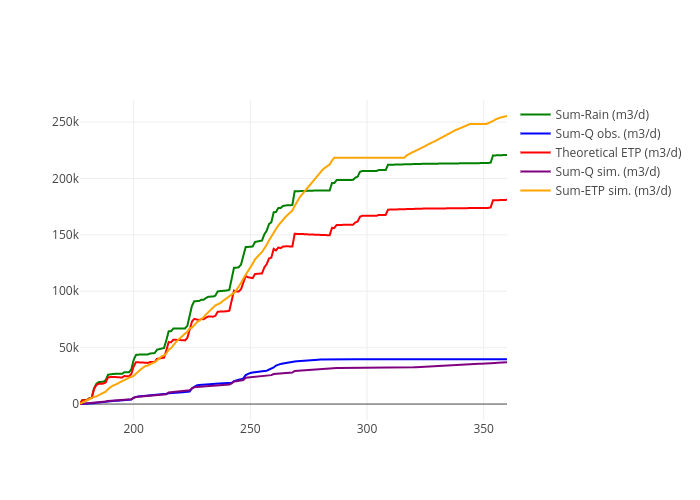

In [24]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)